In [6]:
from __future__ import annotations
import argparse
import os
from pathlib import Path
from typing import List, Tuple

import librosa
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from tinytag import TinyTag 

In [3]:
DATA_PATH = Path('data-source/audio/PD_AH/')
OUTPUT_PATH = Path('artifacts/mel_specs/')
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

In [10]:
raw_audio = os.listdir(DATA_PATH)
for wav in raw_audio:
    file_path = DATA_PATH / wav
 #Attenzione: modelli come Wav2Vec sono addestrati su 16 kHz, cambiare con sr = 16000
 
    y, sr = librosa.load(file_path, sr=8000)
    y = librosa.util.normalize(y)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    np.save(OUTPUT_PATH / (Path(wav).stem + ".npy"), mel)

In [4]:
pippo = np.load(OUTPUT_PATH / 'AH_545616858-3A749CBC-3FEB-4D35-820E-E45C3E5B9B6A.npy')
pippo

array([[-37.46119 , -33.69839 , -32.964535, ..., -80.      , -80.      ,
        -80.      ],
       [-25.625454, -26.382456, -23.069235, ..., -80.      , -80.      ,
        -80.      ],
       [-32.54491 , -26.51846 , -24.919353, ..., -80.      , -80.      ,
        -80.      ],
       ...,
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)

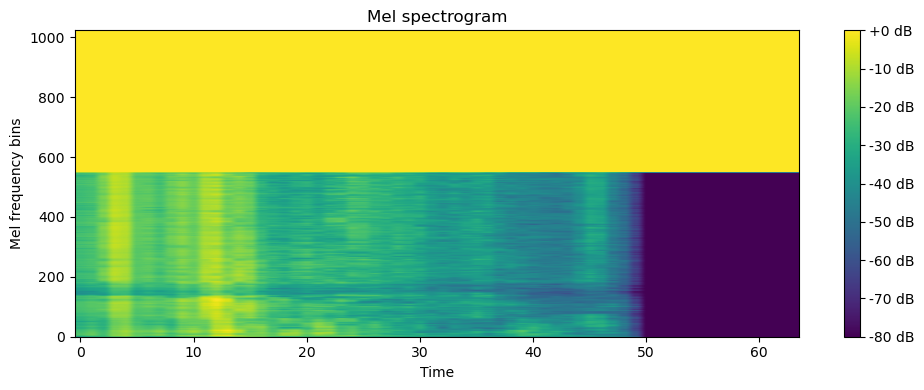

In [7]:
plt.figure(figsize=(10, 4))
plt.imshow(pippo, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.xlabel('Time')
plt.ylabel('Mel frequency bins')
plt.tight_layout()
plt.show()